# Nonlinear Relationships

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target

## Brief Introduction to Decision Tree

# For decision tree we have a challenge of guessing tree depth.To over come this we will use random forest method.

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
X = df[['LSTAT']].values
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [7]:
tree = DecisionTreeRegressor(max_depth=5)

In [8]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
sort_idx = X.flatten().argsort()
sort_idx

array([161, 162,  40, 232, 192, 204,   3, 370, 195, 275, 282, 202, 256,
       226, 268, 283, 368, 163, 290, 274, 252, 253, 291,  98, 251, 166,
       369, 229, 280, 203, 228, 233,  57,   2, 196, 224, 277,  97,  39,
       194, 200, 186, 353, 308, 199, 188, 157, 281, 344, 225,  65, 191,
       292, 237, 299,  55, 182,  41, 279, 303, 298,   0, 193, 179, 325,
       190, 257, 243,   5, 231,  52, 364,  80,   4, 175, 189, 341, 351,
       160,  88,  72, 355, 503, 333, 183,  89,  56,  42, 349, 250, 262,
       311, 350, 348, 276, 300, 324, 326,  99,  93, 295, 177, 238, 347,
       227, 158, 306, 504,  85, 249, 254, 273,  16, 271, 198,  95, 187,
        70,  82,  62, 334,  74,  58, 321, 259, 178, 304, 482, 365, 287,
       343, 278, 320,  81, 261, 329, 239, 296, 159, 201,  43, 267,  83,
       307,  73, 180, 288, 223, 101, 322, 272, 481, 360, 258, 352, 332,
       284, 505, 313, 335,  64, 354, 234,  67, 264,  92,  91, 285,  13,
        53,  87,  15, 338, 293, 197, 342, 302,  37,  69,  90, 37

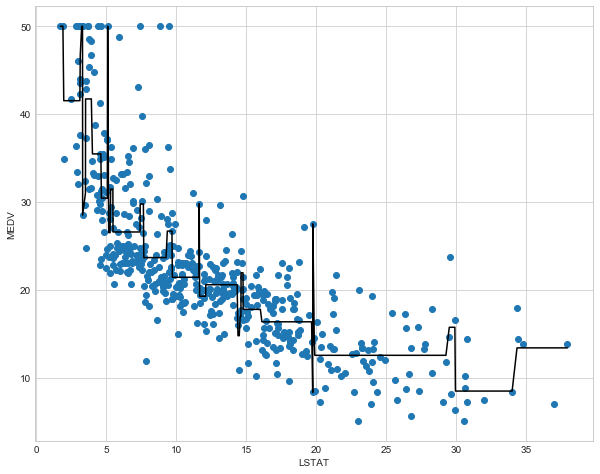

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k') # k represents black color.

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

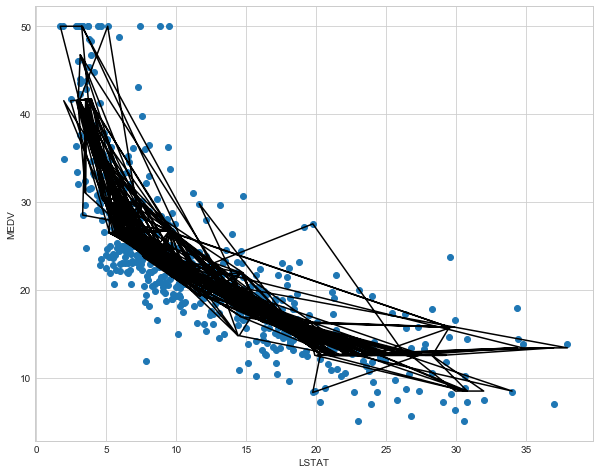

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, tree.predict(X), color='k') # k represents black color.

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

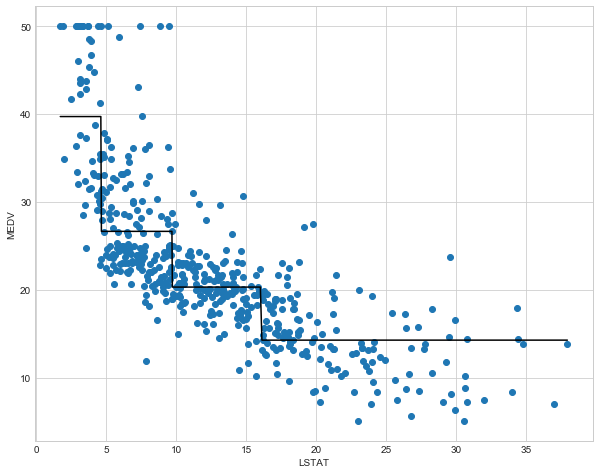

In [12]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# Brief Introduction to Random Forest

In [13]:
from sklearn.model_selection import train_test_split # splitting data into training set and testing set for our performance evaluation.
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df.values
#y = df['MEDV'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, # givving 30% to test side and 70% to training side.
                                                    random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', # here we are using mean square error.
                               random_state=42, n_jobs=-1)

In [18]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
y_train_pred = forest.predict(X_train)

In [20]:
y_test_pred = forest.predict(X_test)

In [21]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8712, test: 9.3994


# mean square error is smaller during training data and larger during testing data.

In [22]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9787, test: 0.8739


# Brief Introduction to AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostRegressor

In [24]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [25]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [26]:
y_train_pred = ada.predict(X_train)

In [27]:
y_test_pred = ada.predict(X_test)

In [28]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 4.4864, test: 13.2099


In [29]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9490, test: 0.8227


***

# Revisiting Feature Importance

In [30]:
ada.feature_importances_

array([0.03380489, 0.00342185, 0.00904711, 0.00108256, 0.04181682,
       0.24254942, 0.00874274, 0.12358089, 0.01733797, 0.02265699,
       0.0392171 , 0.02421406, 0.43252762])

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [33]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.432528
RM,0.242549
DIS,0.123581
NOX,0.041817
PTRATIO,0.039217
CRIM,0.033805
B,0.024214
TAX,0.022657
RAD,0.017338
INDUS,0.009047


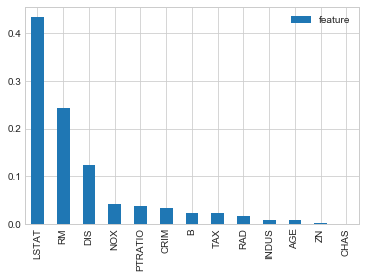

In [34]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***

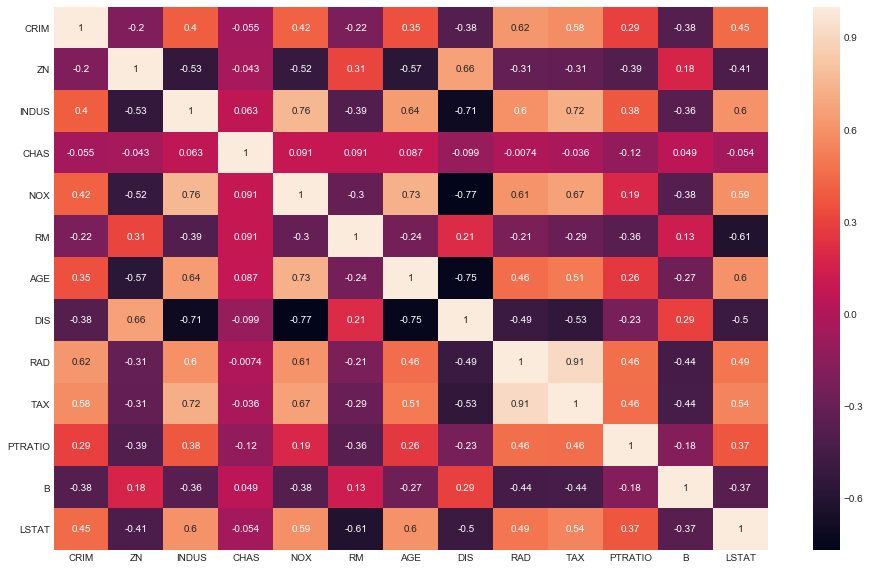

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)